In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
mm = MinMaxScaler()
ss = StandardScaler()



In [3]:

!pip install sklearn
!pip install xgboost













  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=d40f5c3bd6b57862d0c6fb323992900872b0079771dfd2a3c325fe1e229cf2bb
  Stored in directory: c:\users\woghs\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [8]:
#등락으로 분류를 시켰기 때문에 등락 퍼센트는 제거해 주었습니다.다른 변수와 상관성이 너무 높은 속성들은 제거처리 해주었습니다.
df=pd.read_csv(r'C:\test\master_3.csv',encoding='cp949', index_col=0)
df=df.drop('outcome_icu_transfer_12h',axis=1)


df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 448972 entries, 335314 to 335313
Data columns (total 99 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subject_id                    448972 non-null  int64  
 1   stay_id                       448972 non-null  int64  
 2   intime                        448972 non-null  object 
 3   outtime                       448972 non-null  object 
 4   gender                        448972 non-null  int64  
 5   in_year                       448972 non-null  int64  
 6   age                           448972 non-null  int64  
 7   outcome_inhospital_mortality  448972 non-null  bool   
 8   ed_death                      448972 non-null  bool   
 9   before_ed_mortality           448972 non-null  bool   
 10  ed_los                        448972 non-null  object 
 11  outcome_hospitalization       448972 non-null  bool   
 12  outcome_critical              448972 no

In [10]:
drop_df = df.drop(list(df.filter(regex='cci_').columns),axis=1)

In [11]:
df=df.drop('outcome_icu_transfer_12h',axis=1)

,subject_id,stay_id,intime,outtime,gender,in_year,age,outcome_inhospital_mortality,ed_death,before_ed_mortality,...,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon
index,,,,,,,,,,,,,,,,,,,,,
335314,10000032,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,0,2180,52,False,False,False,...,0,36.500000,79.0,16.0,98.0,107.0,60.0,0.0,0.0,9.0
335315,10000032,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,0,2180,52,False,False,False,...,1,36.611111,86.0,17.0,93.0,96.0,57.0,5.0,3.0,12.0
335316,10000032,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,0,2180,52,False,False,False,...,1,36.777778,85.0,18.0,98.0,81.0,38.0,0.0,2.0,14.0
335317,10000032,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,0,2180,52,False,False,False,...,1,37.222222,96.0,18.0,97.0,86.0,45.0,0.0,8.0,14.0
335318,10000032,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,0,2180,52,False,False,False,...,1,36.722222,91.0,18.0,99.0,98.0,60.0,0.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167406,19999784,34149746,2119-08-11 09:15:00,2119-08-11 13:40:00,1,2119,57,False,False,False,...,0,36.722222,72.0,16.0,100.0,131.0,92.0,0.0,1.0,8.0
167407,19999828,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,0,2147,46,False,False,False,...,0,37.555556,78.0,17.0,99.0,108.0,87.0,9.0,11.0,8.0
167408,19999828,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,0,2149,48,False,False,False,...,0,36.722222,109.0,15.0,96.0,111.0,78.0,4.0,8.0,11.0


In [12]:
obj = pd.DataFrame(drop_df.dtypes != 'object')
drop_df = drop_df[obj[obj[0] == True].index]

In [32]:
df=df.drop('outcome_critical',axis=1)

In [23]:
df.iloc[:,9]

index
335314    False
335315    False
335316     True
335317     True
335318    False
          ...  
167406    False
167407    False
167408     True
167409    False
335313     True
Name: outcome_critical, Length: 448972, dtype: bool

In [25]:
df['critical_result'] = df.iloc[:,9]

C:\Users\woghs\AppData\Local\Temp\ipykernel_19120\383542322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['critical_result'] = df.iloc[:,9]


In [47]:
df.to_csv('C:\\test\master_3_1.csv')

In [35]:
#xbbost를 위해 x y 로 데이터 분리 후 dmatrix로 변환 (y=치명적인지 아닌지)
X, y = df.iloc[:,1:-1],df.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)
#시기로 분할할 때 데이터
#split = "2012-03-19"
#train = df[:split]
#test= df[split:]

#y_train = train.loc[:,'등락.분류']
#X_train = train.drop('등락.분류', axis=1)
#y_test = test.loc[:,'등락.분류']
#X_test = test.drop('등락.분류', axis=1)


# 최적화 x

In [42]:
#시기로 분할할 때 데이터
#split = "2012-03-19"
#train = df[:split]
#test= df[split:]

#y_train = train.loc[:,'등락.분류']
#X_train = train.drop('등락.분류', axis=1)
#y_test = test.loc[:,'등락.분류']
#X_test = test.drop('등락.분류', axis=1)

#XGBoost 분류기 생성
xgb_clf = xgb.XGBClassifier()

model=XGBClassifier(booster='gbtree', 
                    colsample_bylevel=0.9, 
                    colsample_bytree=0.8, 
                    gamma=2, 
                    max_depth=9, 
                    min_child_weight=3, 
                    n_estimators=50, 
                    nthread=3, 
                    objective='binary:logistic', 
                   random_state=200, 
                    silent= True)

model.fit(X_train, y_train,verbose=False)

[20:53:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=3,
              nthread=3, num_parallel_tree=1, predictor='auto',
              random_state=200, reg_alpha=0, ...)

In [45]:
#모델 예측
y_pred = model.predict(X_test)
y_true = y_test

acc = accuracy_score(y_true, y_pred)
con_mat = confusion_matrix(y_true, y_pred)
con_mat
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     83825
        True       0.79      0.52      0.62      5970

    accuracy                           0.96     89795
   macro avg       0.88      0.75      0.80     89795
weighted avg       0.95      0.96      0.95     89795



In [43]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# 최적화 O

In [38]:

#시기로 분할할 때 데이터
#split = "2012-03-19"
#train = df[:split]
#test= df[split:]

#y_train = train.loc[:,'등락.분류']
#X_train = train.drop('등락.분류', axis=1)
#y_test = test.loc[:,'등락.분류']
#X_test = test.drop('등락.분류', axis=1)

#XGBoost 분류기 생성
xgb_clf = xgb.XGBClassifier()

#초모수 격자생성
xgb_param_grid = {   
                    
                    'gamma':[0,1,2,3], 
                    'max_depth':[5,6,7,8,9,10], 
                    'min_child_weight':[2,3,4,5,6], 
                    'n_estimators':[50,100,150,200,250], 
                    'nthread':[2,3,4,5,6,7],                    
                    'random_state':[50,100,150,200,250] 
                    }
#GridSearchCV 객체 생성
hr_grid = GridSearchCV(estimator=xgb_clf,
                       param_grid=xgb_param_grid,
                       scoring='roc_auc',
                       n_jobs=8,
                      cv=5,
                    refit=True, 
                     return_train_score=True)
hr_grid.fit(X_train, y_train)
##model=XGBClassifier(booster='gbtree', 
                #    colsample_bylevel=0.9, 
                #    colsample_bytree=0.8, 
                #    gamma=2, 
                #    max_depth=9, 
                #    min_child_weight=3, 
                #    n_estimators=50, 
                #    nthread=3, 
                #    objective='binary:logistic', 
                #   random_state=200, 
                #    silent= True)

#model.fit(X_train, y_train,verbose=False)

KeyboardInterrupt: 

In [54]:
## 최고성능
best_score = hr_grid.best_score_
# 최고성능을 내는 행을 찾아냄
best_row = hr_grid.best_index_

# 최적 초모수: max_depth, subsample
best_max_depth     = hr_grid.best_params_["max_depth"]
best_max_gamma = hr_grid.best_params_["gamma"]
best_max_min_child_weight= hr_grid.best_params_["min_child_weight"]
best_max_n_estimators= hr_grid.best_params_["n_estimators"]
best_max_nthread= hr_grid.best_params_["nthread"]
best_max_random_state= hr_grid.best_params_["random_state"]


#nl = '\n'
#print(f 'AUC:  \t {best_score:.6f}{nl}\
#         index:           \t {best_row}{nl}\
#         max_depth:      \t {max_depth}{nl}\
#         gamma :    \t{gamma}{nl}\
#         min_child_weight: \t{min_child_weight}{nl}\
#         n_estimators:  \t{n_estimators}{nl}\
#         nthread :   \t{nthread}{nl}\
#         random_state:  \t{random_state}'
#     )

In [75]:
hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
hr_grid_df.loc[:,['mean_test_score', "params"]]
hr_grid_df.sort_values(by=['mean_test_score'],ascending=False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_max_depth,param_min_child_weight,param_n_estimators,param_nthread,param_random_state,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
14103,0.319895,0.034785,0.004604,0.000491,3,5,6,50,2,200,...,0.831671,0.024669,1,0.973424,0.946172,0.930469,0.968221,0.965593,0.956776,0.016065
14168,0.965986,0.226159,0.004804,0.000400,3,5,6,150,3,200,...,0.831671,0.024669,1,0.973424,0.946172,0.930469,0.968221,0.965593,0.956776,0.016065
14170,1.022936,0.060985,0.004804,0.000400,3,5,6,150,4,50,...,0.831671,0.024669,1,0.973424,0.946172,0.930469,0.968221,0.965593,0.956776,0.016065
14171,1.104410,0.053053,0.004805,0.000400,3,5,6,150,4,100,...,0.831671,0.024669,1,0.973424,0.946172,0.930469,0.968221,0.965593,0.956776,0.016065
14172,1.084288,0.051406,0.004604,0.000490,3,5,6,150,4,150,...,0.831671,0.024669,1,0.973424,0.946172,0.930469,0.968221,0.965593,0.956776,0.016065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,1.272162,0.010200,0.005605,0.000490,0,6,5,200,6,200,...,0.805078,0.025116,17971,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1314,1.316804,0.014469,0.005405,0.000490,0,6,5,200,6,250,...,0.805078,0.025116,17971,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1315,1.356746,0.013556,0.005405,0.000490,0,6,5,200,7,50,...,0.805078,0.025116,17971,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1316,1.375894,0.010932,0.005405,0.000491,0,6,5,200,7,100,...,0.805078,0.025116,17971,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

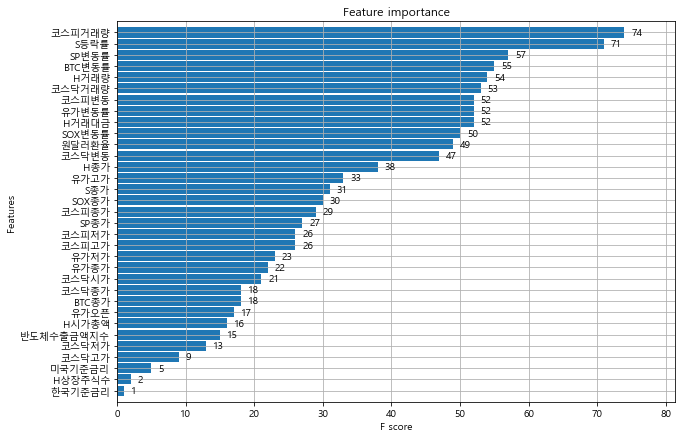

In [55]:
#변수 중요도 그래프
plt.rc('font',family='Malgun Gothic')
plt.rcParams["figure.figsize"] = (10,7)
plot_importance(model, height=0.9)

In [76]:
#모델 예측
y_pred = hr_grid.predict(X_test)
#y_true = y_test

#acc = accuracy_score(y_true, y_pred)
#con_mat = confusion_matrix(y_true, y_pred)
#con_mat
#report = classification_report(y_true, y_pred)
#print(report)

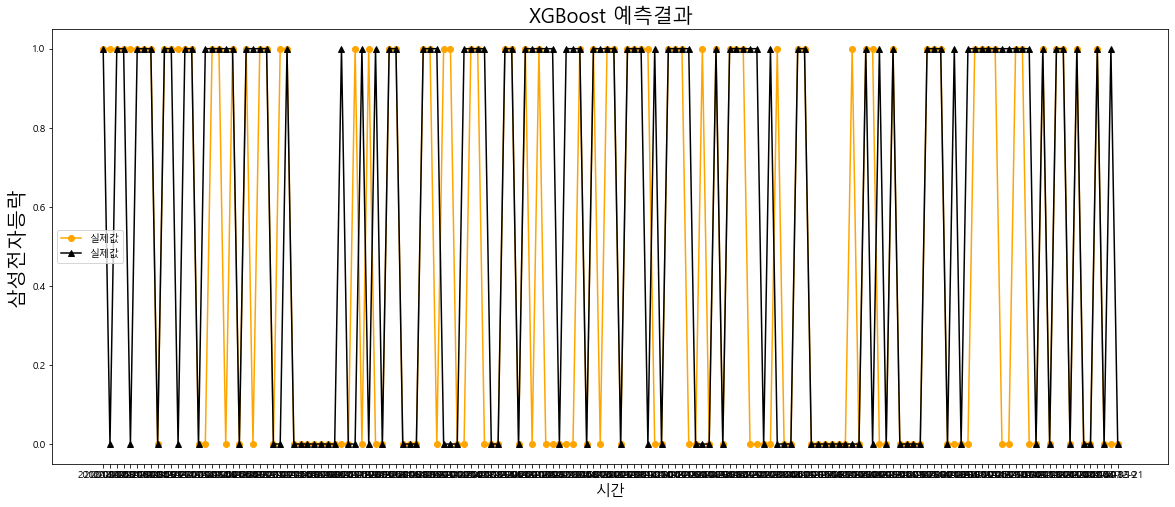

In [79]:
fig =plt.figure( figsize= (20,8))
chart = fig.add_subplot(1,1,1)
chart.plot(y_test[:150],marker='o',color='orange',label='실제값')
chart.plot(y_pred[:150],marker='^',color='black',label='실제값')
chart.set_title('XGBoost 예측결과',size=20)
plt.xlabel('시간',size=15)
plt.ylabel('삼성전자등락',size=20)
plt.legend(loc='best')